In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('20160211_flightlog.csv', header =None)
df.columns = ["MSG","Type","1","2","ICAO_Addr","3", # Field 1 to 6
            "stDate_receive", "stTime_Receive",    # Field 7 & 8
            "stDate_now", "stTime_now",            # Field 9 & 10
            "callsign",                            # Field 11
            "altitude",                            # Field 12
            "speed",                               # Field 13
            "heading",                             # Field 14
            "latitude", "longitude",               # Field 15 & 16
             "vert_rate",                          # Field 17
             "squak",                              # Field 18
             "squak_alert",                        # Field 19
             "squak_emer",                         # Field 20
             "squak_ident",                        # Field 21
             "ground"]                             # Field 22             
df.head(1)
df.tail(1)

,MSG,Type,1,2,ICAO_Addr,3,stDate_receive,stTime_Receive,stDate_now,stTime_now,...,speed,heading,latitude,longitude,vert_rate,squak,squak_alert,squak_emer,squak_ident,ground
1837257,MSG,7,111,11111,A11316,111111,2016/12/04,13:44:28.065,2016/12/04,13:44:28.092,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
df = df[df['ground'] != -1.0]
#df = df[0:100000]

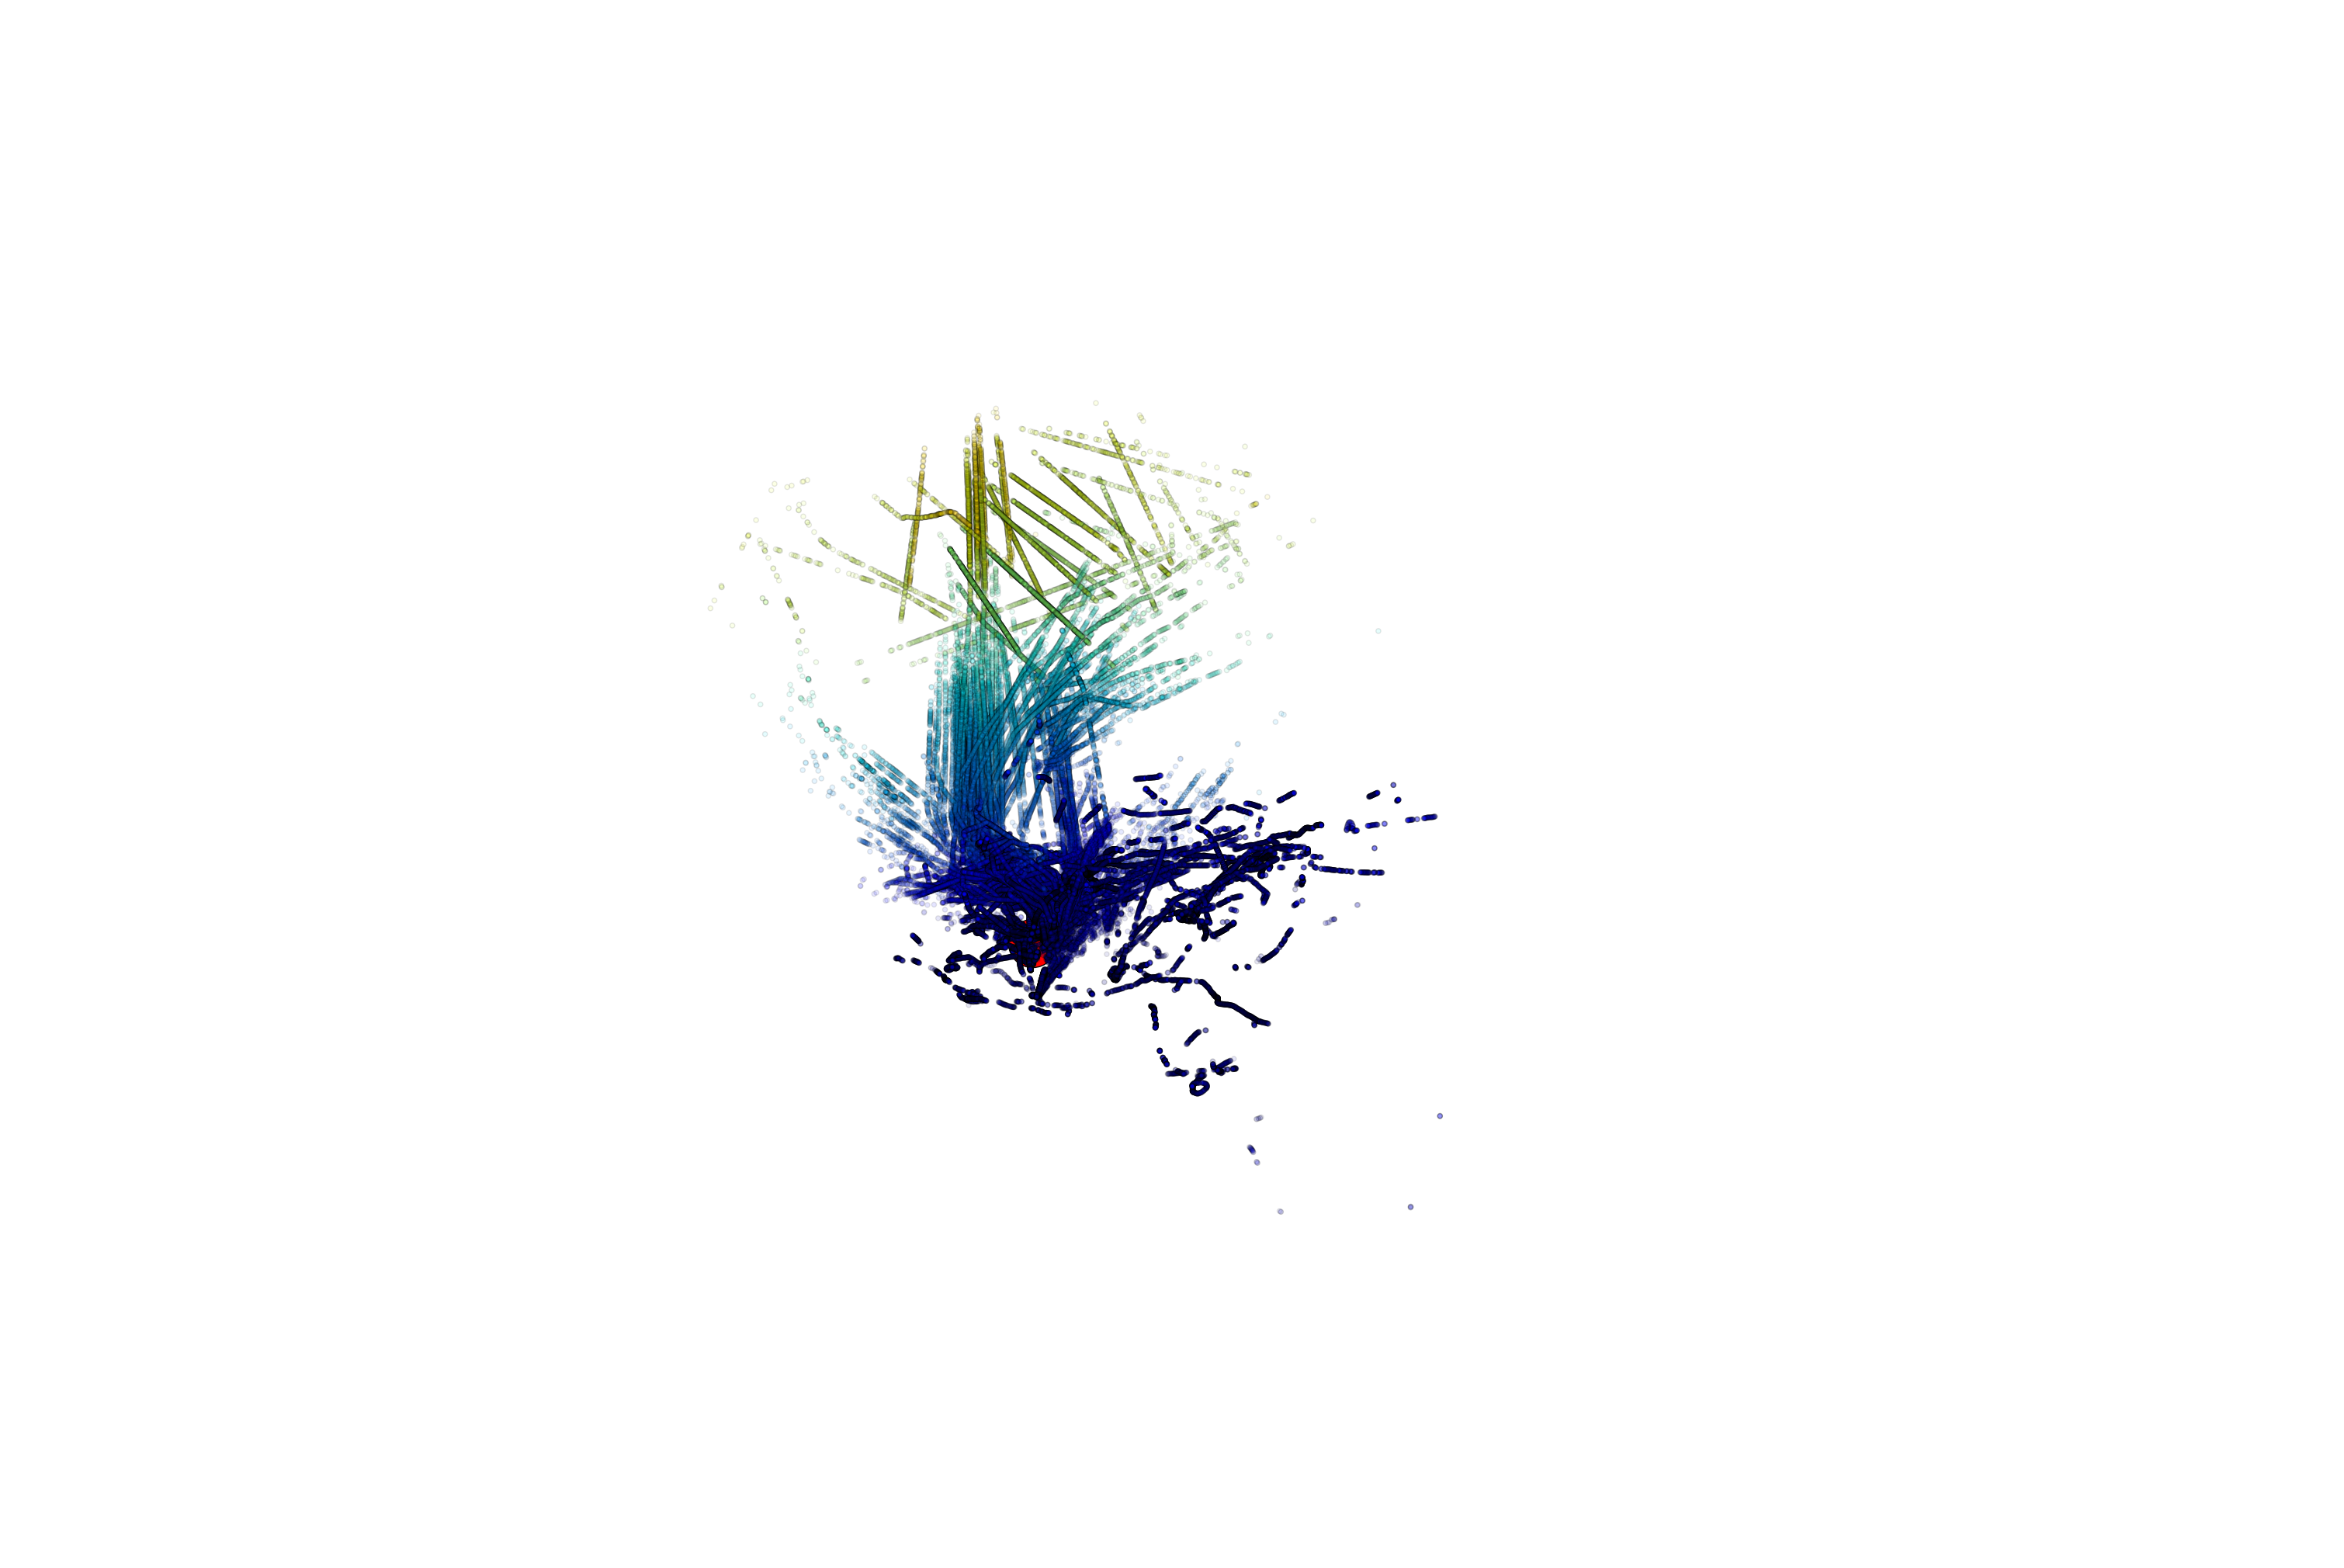

In [6]:
import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

#scatter3d(x,y,z, cs, colorsMap='jet'):
cm = plt.get_cmap('jet')
cNorm = matplotlib.colors.Normalize(0, vmax=max(df['altitude']))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df['latitude'], df['longitude'], df['altitude'], c=scalarMap.to_rgba(df['altitude']),  alpha=0.1)
ax.scatter(37.431964, -122.129095, 0, c='r', s=2000)
scalarMap.set_array(df['altitude'])
#cbar = fig.colorbar(scalarMap)
#cbar.ax.tick_params(labelsize=25) 
#cbar.ax.set_title('Altitude [ft]')
fig.set_size_inches(30, 20)
plt.axis('off')
plt.show()
for ii in xrange(0,360,1):
    ax.view_init(elev=0., azim=ii)
    fig.savefig("movie%d.png" % ii)

In [ ]:
df = df[0:100000]
df.tail(1)

In [ ]:
mpl.rcParams['legend.fontsize'] = 10
fig = plt.figure()
ax = fig.gca(projection='3d')

import matplotlib.cm as cmx
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

def scatter3d(x,y,z, cs, colorsMap='jet'):
    cm = plt.get_cmap(colorsMap)
    cNorm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
    scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(x, y, z, c=scalarMap.to_rgba(cs))
    scalarMap.set_array(cs)
    fig.colorbar(scalarMap)
    fig.set_size_inches(30, 20)
    plt.show()

for key, grp in df.groupby(['ICAO_Addr']):
    try:
        grp = grp.interpolate()
        #grp = grp.dropna()
        z = grp['altitude']
        x = grp['latitude']
        y = grp['longitude']
        ax.scatter(x, y, z)
        fig.set_size_inches(30, 20)
    except:
        continue

scatter3d(df['latitude'], df['longitude'], df['altitude'], df['altitude'])


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

T = np.array([6, 7, 8, 9, 10, 11, 12])
power = np.array([1.53E+03, 5.92E+02, 2.04E+02, 7.24E+01, 2.72E+01, 1.10E+01, 4.70E+00])

plt.plot(T,power)
plt.show()



from scipy.interpolate import spline

xnew = np.linspace(T.min(),T.max(),300)

power_smooth = spline(T,power,xnew)

plt.plot(xnew,power_smooth)
plt.show()

In [ ]:
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt

mpl.rcParams['legend.fontsize'] = 10

fig = plt.figure()
ax = fig.gca(projection='3d')
z = df['altitude']
x = df['latitude']
y = df['longitude']
ax.scatter(x, y, z)
ax.legend()
fig.set_size_inches(20, 20)

In [ ]:
z = df['altitude']
x = df['latitude']
y = df['longitude']

In [ ]:
import rotanimate as ra

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
s = ax.scatter(x,y,z)
plt.axis('off') # remove axes for visual appeal

angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360

# create an animated gif (20ms between frames)
ra.rotanimate(ax, angles,'movie.gif',delay=5) 

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y, Z = ra.axes3d.get_test_data(0.05)
s = ax.plot_surface(X, Y, Z)
plt.axis('off') # remove axes for visual appeal

angles = np.linspace(0,360,21)[:-1] # Take 20 angles between 0 and 360

# create an animated gif (20ms between frames)
ra.rotanimate(ax, angles,'movie.gif',delay=20) 
